In [134]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import plotly.graph_objects as go
import yfinance as yf


In [135]:
# Set the working directory
os.chdir(r"D:\Benson\aUpWork\Douglas Backtester Algo\Backtester Algorithm\Data")

In [136]:
# Load the CSV file
file_path = r"YMAX ETF Stock Price History.csv"
YMAX = pd.read_csv(file_path)

# Display the first few rows
YMAX.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,01/28/2025,16.72,16.57,16.73,16.33,950.74K,1.95%
1,01/27/2025,16.40,16.44,16.62,16.23,2.56M,-2.90%
2,01/24/2025,16.89,17.00,17.08,16.86,1.39M,-0.41%
3,01/23/2025,16.96,16.80,16.97,16.77,1.03M,-0.41%
4,01/22/2025,17.03,17.04,17.09,16.97,1.47M,0.89%


In [137]:
# Load the CSV file
file_path = r"YMAG ETF Stock Price History.csv"
YMAG = pd.read_csv(file_path)

# Display the first few rows
YMAG.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,01/28/2025,18.81,18.48,18.83,18.35,933.82K,2.28%
1,01/27/2025,18.39,18.27,18.53,18.18,1.25M,-2.85%
2,01/24/2025,18.93,19.00,19.07,18.83,848.88K,-0.05%
3,01/23/2025,18.94,18.94,18.97,18.85,585.19K,-0.63%
4,01/22/2025,19.06,18.94,19.09,18.90,622.02K,0.85%


In [138]:
#Convert dates to their right format in both YMAX and YMAG DataFrames
YMAG['Date'] = pd.to_datetime(YMAG['Date'])
YMAX['Date'] = pd.to_datetime(YMAX['Date'])
YMAX = YMAX.set_index('Date')
YMAG = YMAG.set_index('Date')


In [139]:
# Drop columns Vol and Change in both YMAX and YMAG DataFrames
YMAX = YMAX.drop(columns=['Vol.', 'Change %'])
YMAG = YMAG.drop(columns=['Vol.', 'Change %'])

In [140]:
#View the first few rows of the YMAX DataFrame
YMAX.head()

,Price,Open,High,Low
Date,,,,
2025-01-28,16.72,16.57,16.73,16.33
2025-01-27,16.40,16.44,16.62,16.23
2025-01-24,16.89,17.00,17.08,16.86
2025-01-23,16.96,16.80,16.97,16.77
2025-01-22,17.03,17.04,17.09,16.97


In [141]:
#View the first few rows of the YMAG DataFrame
YMAG.head()

,Price,Open,High,Low
Date,,,,
2025-01-28,18.81,18.48,18.83,18.35
2025-01-27,18.39,18.27,18.53,18.18
2025-01-24,18.93,19.00,19.07,18.83
2025-01-23,18.94,18.94,18.97,18.85
2025-01-22,19.06,18.94,19.09,18.90


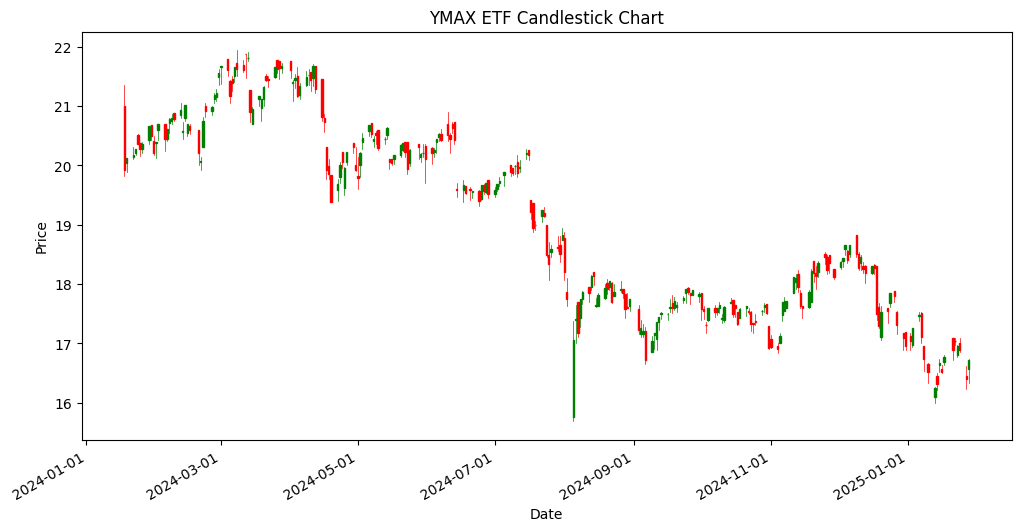

In [142]:
# Convert Date index to datetime format
YMAX.index = pd.to_datetime(YMAX.index)

# Convert dates to numerical format for matplotlib
YMAX['Date'] = YMAX.index.map(mdates.date2num)

# Select required columns for candlestick_ohlc
ohlc = YMAX[['Date', 'Open', 'High', 'Low', 'Price']].copy()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Format the x-axis dates to avoid clutter
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto-adjust date intervals
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as YYYY-MM-DD

# Plot the candlestick chart
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red')

# Labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('YMAX ETF Candlestick Chart')

# Rotate x-axis labels for better readability
fig.autofmt_xdate()

# Show the plot
plt.show()


In [143]:
# Convert index to datetime if it's not already
YMAX.index = pd.to_datetime(YMAX.index)

# Create a Plotly Candlestick Chart
fig = go.Figure(data=[
    go.Candlestick(
        x=YMAX.index,  # X-axis: Date
        open=YMAX['Open'], 
        high=YMAX['High'],
        low=YMAX['Low'], 
        close=YMAX['Price'],
        increasing_line_color='green', 
        decreasing_line_color='red'
    )
])

# Customize Layout
fig.update_layout(
    title="YMAX ETF Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis_rangeslider_visible=False,  # Hide range slider
    template="plotly_dark",  # Optional: dark theme
)

# Show the interactive chart
fig.show()


In [144]:
# Convert index to datetime if it's not already
YMAG.index = pd.to_datetime(YMAG.index)

# Create a Plotly Candlestick Chart
fig = go.Figure(data=[
    go.Candlestick(
        x=YMAG.index,  # X-axis: Date
        open=YMAG['Open'], 
        high=YMAG['High'],
        low=YMAG['Low'], 
        close=YMAG['Price'],
        increasing_line_color='green', 
        decreasing_line_color='red'
    )
])

# Customize Layout
fig.update_layout(
    title="YMAG ETF Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis_rangeslider_visible=False,  # Hide range slider
    template="plotly_dark",  # Optional: dark theme
)

# Show the interactive chart
fig.show()


In [145]:
import pandas as pd

# Drop Open, High, Low columns and rename Price to YMAX in YMAX DataFrame
YMAX = YMAX.drop(columns=['Open', 'High', 'Low']).rename(columns={'Price': 'YMAX'})

# Drop Open, High, Low columns and rename Price to YMAG in YMAG DataFrame
YMAG = YMAG.drop(columns=['Open', 'High', 'Low']).rename(columns={'Price': 'YMAG'})

# Ensure the Date index is set properly and drop any residual "Date" columns if present
if 'Date' in YMAX.columns:
    YMAX = YMAX.drop(columns=['Date'])

if 'Date' in YMAG.columns:
    YMAG = YMAG.drop(columns=['Date'])

# Merge both dataframes on the Date index
YMAX_YMAG_df = pd.merge(YMAX, YMAG, left_index=True, right_index=True, how='inner')
YMAX_YMAG_merged = YMAX_YMAG_df.copy()

# Display the corrected merged DataFrame
YMAX_YMAG_df.head()

,YMAX,YMAG
Date,,
2025-01-28,16.72,18.81
2025-01-27,16.40,18.39
2025-01-24,16.89,18.93
2025-01-23,16.96,18.94
2025-01-22,17.03,19.06


In [146]:
#Compute the sum of Missing values in the YMAX_YMAG DataFrame, if zero then there are no missing values
YMAX_YMAG_df.isnull().sum()

YMAX    0
YMAG    0
dtype: int64

In [147]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add YMAX Line (Blue, No Markers)
fig.add_trace(go.Scatter(
    x=YMAX_YMAG_df.index, 
    y=YMAX_YMAG_df["YMAX"], 
    mode="lines",  # Remove markers
    name="YMAX",
    line=dict(color="blue")
))

# Add YMAG Line (Green, No Markers)
fig.add_trace(go.Scatter(
    x=YMAX_YMAG_df.index, 
    y=YMAX_YMAG_df["YMAG"], 
    mode="lines",  # Remove markers
    name="YMAG",
    line=dict(color="green")
))

# Customize Layout
fig.update_layout(
    title="YMAX vs YMAG Price Trend",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels
    template="plotly_dark",  # Optional: dark mode
    legend=dict(x=0, y=1)  # Position legend at the top-left
)

# Show the interactive plot
fig.show()


In [148]:
# Define rolling window size (e.g., 20 days)
window_size = 21

# Compute daily returns
returns = YMAX_YMAG_df.pct_change().dropna()

# Compute rolling volatilities (standard deviation of returns)
YMAX_YMAG_df["YMAX Volatility"] = returns["YMAX"].rolling(window=window_size).std()
YMAX_YMAG_df["YMAG Volatility"] = returns["YMAG"].rolling(window=window_size).std()

# Compute rolling correlation
YMAX_YMAG_df["Rolling Correlation"] = returns["YMAX"].rolling(window=window_size).corr(returns["YMAG"])

# Drop NaN values resulting from rolling calculations
YMAX_YMAG_df = YMAX_YMAG_df.dropna()

YMAX_YMAG_df

,YMAX,YMAG,YMAX Volatility,YMAG Volatility,Rolling Correlation
Date,,,,,
2024-12-24,17.85,20.21,0.015455,0.013680,0.920583
2024-12-23,17.54,19.88,0.015331,0.013166,0.922149
2024-12-20,17.53,19.63,0.014083,0.012243,0.883521
2024-12-19,17.29,19.60,0.014471,0.012262,0.873417
2024-12-18,17.50,19.62,0.014662,0.012216,0.859698
...,...,...,...,...,...
2024-02-06,20.61,20.20,0.013439,0.013328,0.871627
2024-02-05,20.44,20.19,0.013310,0.013012,0.862776
2024-02-02,20.70,20.30,0.013559,0.013065,0.871646


In [149]:
# Plot Rolling Volatilities
fig_vol = go.Figure()

fig_vol.add_trace(go.Scatter(
    x=YMAX_YMAG_df.index, 
    y=YMAX_YMAG_df["YMAX Volatility"], 
    mode="lines", 
    name="YMAX Volatility",
    line=dict(color="blue")
))

fig_vol.add_trace(go.Scatter(
    x=YMAX_YMAG_df.index, 
    y=YMAX_YMAG_df["YMAG Volatility"], 
    mode="lines", 
    name="YMAG Volatility",
    line=dict(color="green")
))

fig_vol.update_layout(
    title="Rolling Volatilities of YMAX and YMAG",
    xaxis_title="Date",
    yaxis_title="Volatility",
    template="plotly_dark",
    legend=dict(x=0, y=1)
)

fig_vol.show()


In [150]:

# Plot Rolling Correlation
fig_corr = go.Figure()

fig_corr.add_trace(go.Scatter(
    x=YMAX_YMAG_df.index, 
    y=YMAX_YMAG_df["Rolling Correlation"], 
    mode="lines", 
    name="Rolling Correlation",
    line=dict(color="red")
))

fig_corr.update_layout(
    title="Rolling Correlation between YMAX and YMAG",
    xaxis_title="Date",
    yaxis_title="Correlation",
    template="plotly_dark",
    legend=dict(x=0, y=1),
    yaxis=dict(range=[-1,1])  # Correlation is always between -1 and 1
)

fig_corr.show()


In [151]:
# Download the data of VIX, VVIX, and QQQ ETF
VIX = yf.download('^VIX', start='2024-01-01', end='2025-01-30')
VVIX = yf.download('^VVIX', start='2024-01-01', end='2025-01-30')
QQQ = yf.download('QQQ', start='2024-01-01', end='2025-01-30')

# Rename the columns
VIX.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
VVIX.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
QQQ.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [152]:
# Function to create candlestick chart
def create_candlestick_chart(df, title):
    df.index = pd.to_datetime(df.index)  # Ensure index is datetime
    fig = go.Figure(data=[
        go.Candlestick(
            x=df.index, 
            open=df['Open'], 
            high=df['High'], 
            low=df['Low'], 
            close=df['Close'], 
            increasing_line_color='green', 
            decreasing_line_color='red'
        )
    ])
    
    # Customize Layout
    fig.update_layout(
        title=title,
        xaxis_title="Date",
        yaxis_title="Price",
        xaxis_rangeslider_visible=False,  # Hide range slider
        template="plotly_dark",  # Dark theme for visualization
    )
    
    fig.show()  # Show the chart

# Create charts for each asset
create_candlestick_chart(VIX, "VIX Candlestick Chart")
create_candlestick_chart(VVIX, "VVIX Candlestick Chart")
create_candlestick_chart(QQQ, "QQQ Candlestick Chart")


In [153]:
# Rename "Close" column and drop other columns
VIX = VIX[['Close']].rename(columns={'Close': 'VIX'})
VVIX = VVIX[['Close']].rename(columns={'Close': 'VVIX'})
QQQ = QQQ[['Close']].rename(columns={'Close': 'QQQ'})

# Merge VIX, VVIX, and QQQ DataFrames on the Date index
merged_vix_vvix_qqq_df = VIX \
    .merge(VVIX, left_index=True, right_index=True, how='outer') \
    .merge(QQQ, left_index=True, right_index=True, how='outer')

# Merge the VIX, VVIX, and QQQ DataFrames with the YMAX_YMAG_merged DataFrame
merged_df = YMAX_YMAG_merged.merge(
    merged_vix_vvix_qqq_df, left_index=True, right_index=True, how='outer'
)

#Drop the NaN values
merged_df = merged_df.dropna()
merged_df

,YMAX,YMAG,VIX,VVIX,QQQ
Date,,,,,
2024-01-31,20.20,19.49,14.35,87.559998,414.506744
2024-02-01,20.39,19.75,13.88,84.830002,419.387695
2024-02-02,20.70,20.30,13.85,83.309998,426.475616
2024-02-05,20.44,20.19,13.67,79.580002,425.918945
2024-02-06,20.61,20.20,13.06,76.970001,425.063995
...,...,...,...,...,...
2025-01-22,17.03,19.06,15.10,100.559998,531.510010
2025-01-23,16.96,18.94,15.02,99.519997,532.640015
2025-01-24,16.89,18.93,14.85,100.410004,529.630005


In [161]:
# Exporting the prices to a csv
merged_df.to_csv('All assets Prices.csv', index=False)

In [160]:
# Create a figure
fig = go.Figure()

# Add YMAX Line (Blue)
fig.add_trace(go.Scatter(x=merged_df.index, y=merged_df["YMAX"], mode="lines", name="YMAX", line=dict(color="blue")))

# Add YMAG Line (Green)
fig.add_trace(go.Scatter(x=merged_df.index, y=merged_df["YMAG"], mode="lines", name="YMAG", line=dict(color="green")))

# Add VIX Line (Red)
fig.add_trace(go.Scatter(x=merged_df.index, y=merged_df["VIX"], mode="lines", name="VIX", line=dict(color="red")))

# Add VVIX Line (Purple)
# fig.add_trace(go.Scatter(x=merged_df.index, y=merged_df["VVIX"], mode="lines", name="VVIX", line=dict(color="purple")))

# Add QQQ Line (Orange)
# fig.add_trace(go.Scatter(x=merged_df.index, y=merged_df["QQQ"], mode="lines", name="QQQ", line=dict(color="orange")))

# Customize Layout
fig.update_layout(
    title="YMAX, YMAG and VIX Price Trends",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis=dict(tickangle=-45),
    template="plotly_dark",
    legend=dict(x=0, y=1)
)

# Show the interactive plot
fig.show()


In [155]:
# Define rolling window size (e.g., 21 days)
window_size = 21

# Compute daily returns for each asset in merged_df
returns = merged_df.pct_change().dropna()

# Initialize stats_df with rolling volatilities
stats_df = pd.DataFrame(index=returns.index)

# Compute rolling volatilities (standard deviation of returns) for each asset
for column in merged_df.columns:
    stats_df[f"{column} Volatility"] = returns[column].rolling(window=window_size).std()

# Compute rolling correlations
stats_df["YMAX-VIX Correlation"] = returns["YMAX"].rolling(window=window_size).corr(returns["VIX"])
stats_df["YMAX-VVIX Correlation"] = returns["YMAX"].rolling(window=window_size).corr(returns["VVIX"])
stats_df["YMAG-VIX Correlation"] = returns["YMAG"].rolling(window=window_size).corr(returns["VIX"])
stats_df["YMAG-VVIX Correlation"] = returns["YMAG"].rolling(window=window_size).corr(returns["VVIX"])

# Drop NaN values resulting from rolling calculations
stats_df = stats_df.dropna()
stats_df

,YMAX Volatility,YMAG Volatility,VIX Volatility,VVIX Volatility,QQQ Volatility,YMAX-VIX Correlation,YMAX-VVIX Correlation,YMAG-VIX Correlation,YMAG-VVIX Correlation
Date,,,,,,,,,
2024-03-01,0.013069,0.013785,0.051710,0.043429,0.010393,-0.626499,-0.549622,-0.508677,-0.456559
2024-03-04,0.013071,0.014021,0.051693,0.043371,0.010300,-0.626533,-0.549422,-0.510632,-0.458702
2024-03-05,0.013642,0.013287,0.054021,0.045045,0.010663,-0.675417,-0.589907,-0.593275,-0.510036
2024-03-06,0.013392,0.013233,0.053891,0.043883,0.010716,-0.706867,-0.681932,-0.603820,-0.546858
2024-03-07,0.013522,0.013545,0.052771,0.043262,0.011108,-0.700723,-0.679942,-0.611949,-0.559811
...,...,...,...,...,...,...,...,...,...
2025-01-22,0.014590,0.012203,0.091306,0.073777,0.011819,-0.647490,-0.617914,-0.637645,-0.556642
2025-01-23,0.014398,0.012251,0.088211,0.072508,0.011740,-0.727224,-0.605098,-0.658971,-0.565712
2025-01-24,0.014010,0.012234,0.072461,0.063766,0.011736,-0.742413,-0.578384,-0.763446,-0.611782


In [156]:
# Create a figure for rolling volatilities
fig_vol = go.Figure()

# Add each asset's rolling volatility to the plot
colors = {"YMAX": "blue", "YMAG": "green", "VIX": "red", "VVIX": "purple", "QQQ": "orange"}

for column, color in colors.items():
    fig_vol.add_trace(go.Scatter(
        x=stats_df.index, 
        y=stats_df[f"{column} Volatility"], 
        mode="lines", 
        name=f"{column} Volatility",
        line=dict(color=color)
    ))

# Customize layout
fig_vol.update_layout(
    title="Rolling Volatilities of YMAX, YMAG, VIX, VVIX, and QQQ",
    xaxis_title="Date",
    yaxis_title="Volatility",
    template="plotly_dark",
    legend=dict(x=0, y=1)
)

# Show the interactive plot
fig_vol.show()


In [157]:
# Create figure for YMAX correlations
fig_ymax_corr = go.Figure()

# Add YMAX-VIX Correlation (Blue)
fig_ymax_corr.add_trace(go.Scatter(
    x=stats_df.index, 
    y=stats_df["YMAX-VIX Correlation"], 
    mode="lines", 
    name="YMAX-VIX Correlation",
    line=dict(color="blue")
))

# Add YMAX-VVIX Correlation (Red)
fig_ymax_corr.add_trace(go.Scatter(
    x=stats_df.index, 
    y=stats_df["YMAX-VVIX Correlation"], 
    mode="lines", 
    name="YMAX-VVIX Correlation",
    line=dict(color="red")
))

# Customize layout for YMAX correlation plot
fig_ymax_corr.update_layout(
    title="Rolling Correlations of YMAX with VIX and VVIX",
    xaxis_title="Date",
    yaxis_title="Correlation",
    template="plotly_dark",
    legend=dict(x=0, y=1)
)

# Create figure for YMAG correlations
fig_ymag_corr = go.Figure()

# Add YMAG-VIX Correlation (Green)
fig_ymag_corr.add_trace(go.Scatter(
    x=stats_df.index, 
    y=stats_df["YMAG-VIX Correlation"], 
    mode="lines", 
    name="YMAG-VIX Correlation",
    line=dict(color="green")
))

# Add YMAG-VVIX Correlation (Purple)
fig_ymag_corr.add_trace(go.Scatter(
    x=stats_df.index, 
    y=stats_df["YMAG-VVIX Correlation"], 
    mode="lines", 
    name="YMAG-VVIX Correlation",
    line=dict(color="purple")
))

# Customize layout for YMAG correlation plot
fig_ymag_corr.update_layout(
    title="Rolling Correlations of YMAG with VIX and VVIX",
    xaxis_title="Date",
    yaxis_title="Correlation",
    template="plotly_dark",
    legend=dict(x=0, y=1)
)

# Show the plots
fig_ymax_corr.show()
fig_ymag_corr.show()


In [158]:
# correlation of them all against each other
merged_df.corr()

,YMAX,YMAG,VIX,VVIX,QQQ
YMAX,1.000000,0.797942,-0.595510,-0.733907,-0.700428
YMAG,0.797942,1.000000,-0.705460,-0.742475,-0.230507
VIX,-0.595510,-0.705460,1.000000,0.938882,0.083769
VVIX,-0.733907,-0.742475,0.938882,1.000000,0.278904
QQQ,-0.700428,-0.230507,0.083769,0.278904,1.000000


The above analysis presents visualizations of the volatilities and correlations of the assets. We have both the overall correlations and the rolling correlations, the rolling correlations help track how asset relationships change over time, revealing shifts in market dynamics and risk exposure. Unlike static correlations, they adapt to different market conditions, aiding in diversification and hedging strategies. A sudden rise in correlation may signal market stress, while a drop can indicate idiosyncratic movements.